# Online Retail Dataset

This dataset contains purchases made for an online retail company based in UK during an eight-month period. The target will be to identify different customer segments and customer profiles using unsupervised machine learning techniques.


## Objective
The target will be to identify different customer segments and customer profiles using unsupervised machine learning techniques.

1- K Means (By Elbow and silhouette Method)

2- Mini Batch KMeans 

3- Meanshift Clustering

4- Hierarchical Agglomerative Clustering

### 1. Business Understanding

In big ecommerce businesses customer segmentation and clustering is importnat so our main objective is to find patterns in this data which can get benifit to company in segmentize and target there audience more accurately.

* Increasing revenue (Knowing customers who present most of our revenue)
* Increasing customer retention
* Discovering Trends and patterns
* Defining customers at risk

# Features:

* InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

* StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.

* Description: Product (item) name. Nominal.

* Quantity: The quantities of each product (item) per transaction. Numeric.

* InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.

* UnitPrice: Unit price. Numeric, Product price per unit in sterling.

* CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

* Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
#importing modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from sklearn.metrics import silhouette_samples, silhouette_score
from pandas.plotting import scatter_matrix
from sklearn.cluster import MiniBatchKMeans

## 1. Loading the Dataset

In [2]:
#defining a function which converts data into Date time format
date_encode = lambda x: pd.datetime.strptime(x, '%m/%d/%Y %H:%M')

In [3]:
#Load Dataset
DS_3 = pd.read_csv("C:/Users/Hassan Ahmed/Desktop/Data Science Cohort-1 FTI/OnlineRetail.csv", parse_dates=['InvoiceDate'], 
                   date_parser=date_encode, encoding = 'unicode_escape')
print ("Columns of Online Retail Dataset are: ",DS_3.columns)

Columns of Online Retail Dataset are:  Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


## 2. Exploratory Data Analysis

In [4]:
DS_3.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [5]:
#shape of our dataset
print("The shape of our dataset is: ", DS_3.shape)

The shape of our dataset is:  (541909, 8)


In [6]:
# Finding top Unique Country and its no. of entries
DS_3["Country"].value_counts().head()

United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Name: Country, dtype: int64

#### 2.Descriptive Statistics

In [7]:
#Some data Stats
DS_3.info() # information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Our dataset is composed of 541909 rows and 8 columns. When going through the columns, we notice that we have some missing values in the CustomerID column, as it only has 406829 values. Also the column Description has missing values. So, that should be considered when applying exploration to our dataset.

Now lets have some look at quantitative features

In [8]:
DS_3.describe() #Summary Stastics

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


By looking at this we can see that our data has some negative values and this may be because of the returned or cancelled orders.

In [9]:
#exploring the unique values of each attribute
print("Number of transactions: ", DS_3['InvoiceNo'].nunique())
print("Number of products bought: ",DS_3['StockCode'].nunique())
print("Number of customers:", DS_3['CustomerID'].nunique() )
print("Percentage of customers ID which are not available: ", round(DS_3['CustomerID'].isnull().sum() * 100 / len(DS_3),2),"%" )
print('Number of countries: ',DS_3['Country'].nunique())


Number of transactions:  25900
Number of products bought:  4070
Number of customers: 4372
Percentage of customers ID which are not available:  24.93 %
Number of countries:  38


In [10]:
#get canceled transactions
cancelled_orders = DS_3[DS_3['InvoiceNo'].astype(str).str.contains('C')]
cancelled_orders.shape

(9288, 8)

In [11]:
total_orders = DS_3['InvoiceNo'].nunique()
cancelled_number = len(cancelled_orders)
print('Percentage of orders canceled: {}/{} ({:.2f}%) '.format(cancelled_number, total_orders, cancelled_number/total_orders*100))

Percentage of orders canceled: 9288/25900 (35.86%) 


### Number of Products per Invoice Number

In [12]:
nppin =DS_3.groupby(['InvoiceNo','CustomerID'],as_index=False)['InvoiceDate'].count()
cus_inv = nppin.rename(columns = {'InvoiceDate':'Number of products'})
cus_inv.head()

,InvoiceNo,CustomerID,Number of products
0,536365,17850.0,7
1,536366,17850.0,2
2,536367,13047.0,12
3,536368,13047.0,4
4,536369,13047.0,1


In [13]:
cus_inv.describe()

,CustomerID,Number of products
count,22190.000000,22190.000000
mean,15238.498738,18.333889
std,1733.149624,23.892111
min,12346.000000,1.000000
25%,13755.000000,3.000000
50%,15136.000000,12.000000
75%,16746.000000,24.000000
max,18287.000000,542.000000


By looking into it we see that most of the people i.e. 75% buy upto 24 products or less.

### Total Cost Column

In [14]:
DS_3['Total_Cost'] = DS_3['Quantity'] * DS_3['UnitPrice']

In [15]:
DS_3.groupby('Country').sum().sort_values(by='Total_Cost', ascending=False).head()

,Quantity,UnitPrice,CustomerID,Total_Cost
Country,,,,
United Kingdom,4263829,2.245715e+06,5.626433e+09,8.187806e+06
Netherlands,200128,6.492550e+03,3.419054e+07,2.846615e+05
EIRE,142637,4.844719e+04,1.103917e+08,2.632768e+05
Germany,117448,3.766600e+04,1.200751e+08,2.216982e+05
France,110480,4.303199e+04,1.076489e+08,1.974039e+05


We can see that these are the top 5 countries by the generation of revenue

In [16]:
DS_3_uk = DS_3[DS_3['Country']=='United Kingdom']
DS_3_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Cost
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [17]:
# Which Products are most bought in UK
groupedProduct = DS_3_uk.groupby('StockCode',as_index= False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
groupedProduct.head(10)

,StockCode,Quantity
1145,22197,52928
2995,84077,48326
3511,85099B,43167
3532,85123A,36706
3302,84879,33519
1528,22616,25307
452,21212,24702
1126,22178,23242
83,17003,22801
964,21977,20288


#### 3. Missing Values identification and handling

In [18]:
#Looking out for missing values and handling them
DS_3_uk.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
Total_Cost          0
dtype: int64

In [19]:
DS_3_uk.dropna(axis="index",subset=["CustomerID"],inplace=True)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
DS_3_uk.Quantity[DS_3_uk.Quantity < 0]=np.nan
DS_3_uk.dropna(axis="index",subset=["Quantity"],inplace=True)
DS_3_uk["Quantity"]=DS_3_uk["Quantity"].astype("int64")

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3325: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
E:\Anaconda\lib\site-packages\ipykernel_

In [21]:
DS_3_uk.UnitPrice[DS_3_uk.UnitPrice < 0]=np.nan
DS_3_uk.dropna(axis="index",subset=["UnitPrice"],inplace=True)

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
# Checking Datatime length 
DS_3_uk["InvoiceDate"].max()-DS_3_uk["InvoiceDate"].min()

Timedelta('373 days 04:23:00')

By looking at this we can see that we can make it round to 365 days for 1 year

In [23]:
DS_3_uk = DS_3_uk[DS_3_uk['InvoiceDate']>= "2010-12-09"]

In [24]:
#exploring the unique values of each attribute
print("Number of transactions: ", DS_3_uk['InvoiceNo'].nunique())
print("Number of products bought: ",DS_3_uk['StockCode'].nunique())
print("Number of customers:", DS_3_uk['CustomerID'].nunique() )
print("Percentage of customers ID which are not available: ", round(DS_3_uk['CustomerID'].isnull().sum() * 100 / len(DS_3_uk),2),"%" )
print('Number of countries: ',DS_3_uk['Country'].nunique())

Number of transactions:  16017
Number of products bought:  3611
Number of customers: 3863
Percentage of customers ID which are not available:  0.0 %
Number of countries:  1


# Theory Related to RFM Analysis

RFM analysis (recency, frequency, monetary)

RFM (recency, frequency, monetary) analysis is a marketing technique used to determine quantitatively which customers are the best ones by examining how recently a customer has purchased (recency), how often they purchase (frequency), and how much the customer spends (monetary). RFM analysis is based on the marketing axiom that "80% of your business comes from 20% of your customers."

* RECENCY (R): Days since last purchase
* FREQUENCY (F): Total number of purchases
* MONETARY VALUE (M): Total money this customer spent.

RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

Although RFM analysis is a useful tool, it does have its limitations. A company must be careful not to oversolicit customers with the highest rankings. Experts also caution marketers to remember that customers with low cell rankings should not be neglected, but instead should be cultivated to become better customers.



## Recency 

In [25]:
import datetime as dt
cur_d=dt.date(2011,12,9)

In [26]:
#create a new column called date which contains the date of invoice only
DS_3_uk['date'] = DS_3_uk['InvoiceDate'].dt.date
DS_3_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Cost,date
19632,537879,22114,HOT WATER BOTTLE TEA AND SYMPATHY,12,2010-12-09 08:34:00,3.95,14243.0,United Kingdom,47.4,2010-12-09
19633,537879,22835,HOT WATER BOTTLE I AM SO POORLY,8,2010-12-09 08:34:00,4.65,14243.0,United Kingdom,37.2,2010-12-09
19634,537879,85150,LADIES & GENTLEMEN METAL SIGN,6,2010-12-09 08:34:00,2.55,14243.0,United Kingdom,15.3,2010-12-09
19635,537879,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,4,2010-12-09 08:34:00,7.95,14243.0,United Kingdom,31.8,2010-12-09
19636,537879,21524,DOORMAT SPOTTY HOME SWEET HOME,2,2010-12-09 08:34:00,7.95,14243.0,United Kingdom,15.9,2010-12-09


In [27]:
#group by customers and check last date of purshace
recency_df = DS_3_uk.groupby(by='CustomerID', as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']
#calculate recency
recency_df['Recency'] = recency_df['LastPurshaceDate'].apply(lambda x: (cur_d - x).days)
#drop LastPurchaseDate as we don't need it anymore
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)

In [28]:
recency_df.head()

,CustomerID,Recency
0,12346.0,325
1,12747.0,2
2,12748.0,0
3,12749.0,3
4,12820.0,3


# Frequency

In [29]:
# drop duplicates
retail_uk_copy = DS_3_uk.copy()
retail_uk_copy.drop_duplicates(subset=['InvoiceNo', 'CustomerID'], keep="first", inplace=True)
#calculate frequency of purchases
frequency_df = retail_uk_copy.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,1
1,12747.0,10
2,12748.0,196
3,12749.0,5
4,12820.0,4


# Monetary Value

In [30]:
monetary_df = DS_3_uk.groupby(by='CustomerID',as_index=False).agg({'Total_Cost': 'sum'})
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12747.0,3837.45
2,12748.0,31854.58
3,12749.0,4090.88
4,12820.0,942.34


In [31]:
#merge with monetary dataframe to get a table with the 3 columns
rf_df = recency_df.merge(frequency_df,on='CustomerID')
rfm_df = rf_df.merge(monetary_df,on='CustomerID')
#use CustomerID as index
rfm_df.set_index('CustomerID',inplace=True)
#check the head
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,10,3837.45
12748.0,0,196,31854.58
12749.0,3,5,4090.88
12820.0,3,4,942.34


In [32]:
numerical=list(rfm_df.columns)

#### 4. Visualize

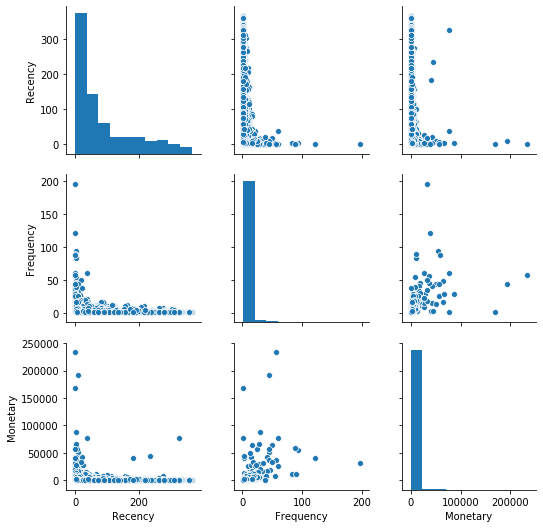

In [33]:
sns.pairplot(rfm_df)

The above diagram shows pairplot of all the numerical features.

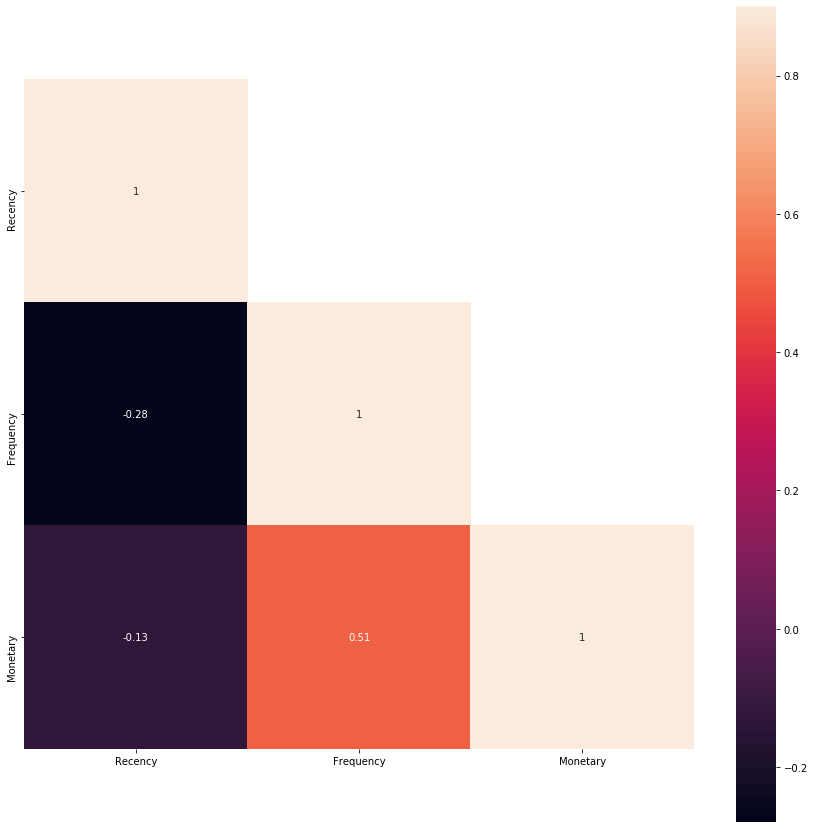

In [34]:
#create correlation
corr=rfm_df.corr()

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

The heatmap shows best correlation between credit amount and duration.

Plotting Box plots to find outliers - The box plot shows outliers in the numerical features

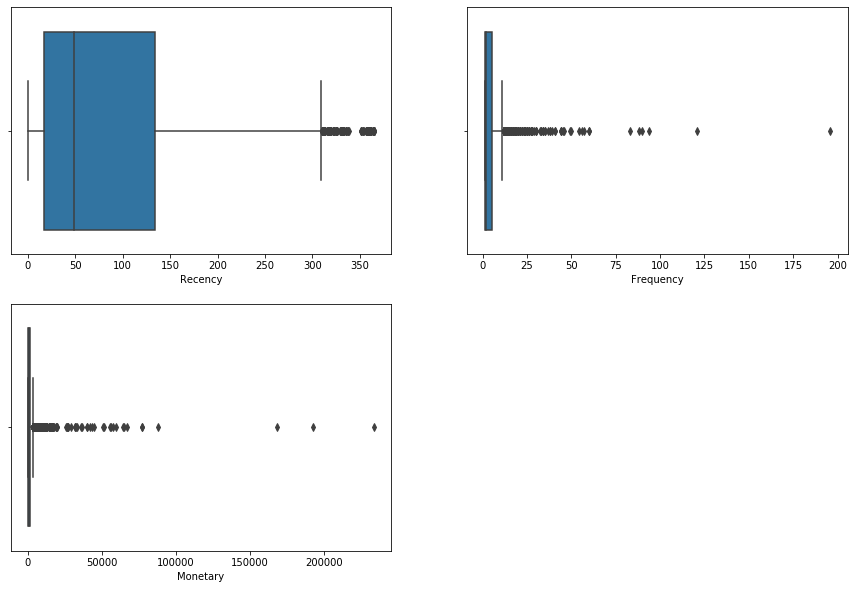

In [35]:
fig = plt.figure(figsize = (15,10))
axes = 220
for num in numerical:
    axes += 1
    fig.add_subplot(axes)
    sns.boxplot(data = rfm_df, x = num)
plt.show()

No handles with labels found to put in legend.


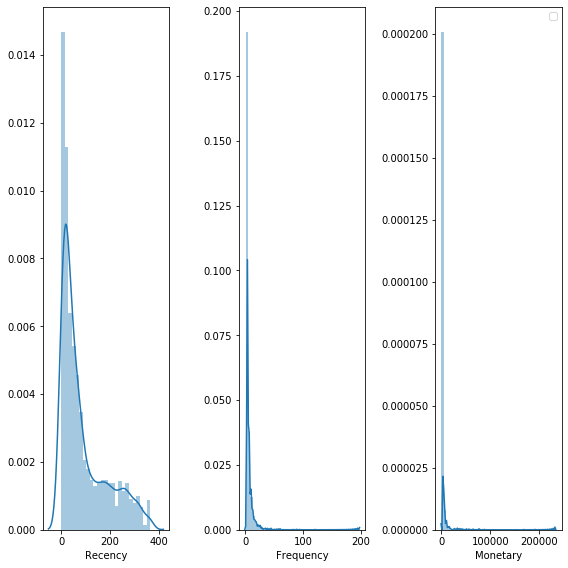

In [36]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(8,8))
sns.distplot(rfm_df["Recency"], ax=ax1)
sns.distplot(rfm_df["Frequency"], ax=ax2)
sns.distplot(rfm_df["Monetary"], ax=ax3)
plt.tight_layout()
plt.legend()

Here we can see that features are skewed and has many outliers so we will normalize them

# Data Normalization

In [37]:
#log transformation
rfm_df_logr = np.log(rfm_df['Recency']+0.1) #can't take log(0) and so add a small number
rfm_df_logf = np.log(rfm_df['Frequency'])
rfm_df_logm = np.log(rfm_df['Monetary']+0.1)
log_df = pd.DataFrame({'Recency': rfm_df_logr,'Frequency': rfm_df_logf,'Monetary': rfm_df_logm})
log_df.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,5.784133,0.000000,11.253944
12747.0,0.741937,2.302585,8.252589
12748.0,-2.302585,5.278115,10.368940
12749.0,1.131402,1.609438,8.316540
12820.0,1.131402,1.386294,6.848472


No handles with labels found to put in legend.


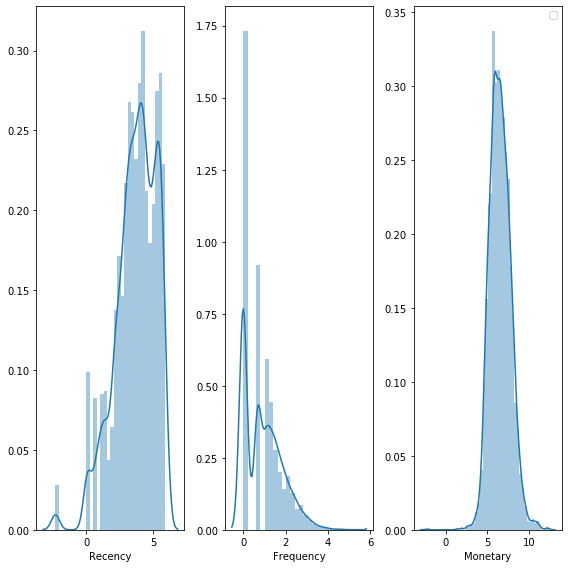

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(8,8))
sns.distplot(log_df["Recency"], ax=ax1)
sns.distplot(log_df["Frequency"], ax=ax2)
sns.distplot(log_df["Monetary"], ax=ax3)
plt.tight_layout()
plt.legend()

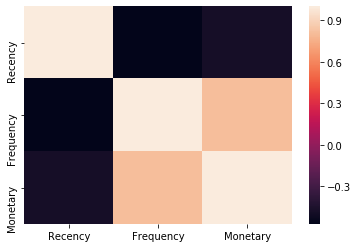

In [39]:
sns.heatmap(log_df.corr())

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(log_df)

#  Models

### 1- K-means (By Elbow Method & silhouette Method)
 
### 2- Mini Batch K-means

### 3- Mean Shift

### 4- Agglomerative Clustering

# 1) K-Means

#### Elbow Method

K-means
First we use the Elbow Method to determine the optimal k value for the k-means

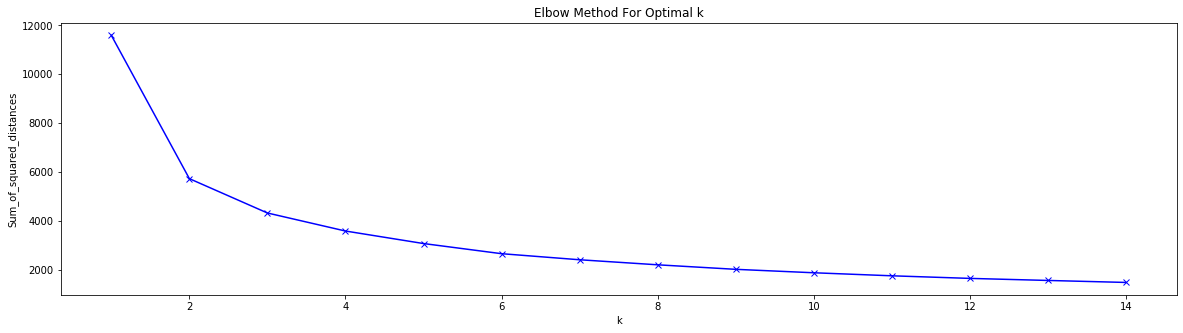

In [41]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_scaled)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [42]:
print(Sum_of_squared_distances)

[11589.0, 5723.813487539917, 4318.80260063879, 3580.850327595216, 3068.6620590961, 2653.1555965270463, 2404.771524135381, 2198.1740809511184, 2013.306669603044, 1872.5235213582391, 1748.3429429557923, 1642.2671387970652, 1558.1209688012714, 1476.266883742605]


From the figure above we can see that the most optimal values are 3. So we choose 3 as the k values of the k-means model.

## i. K Means

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


K-Means


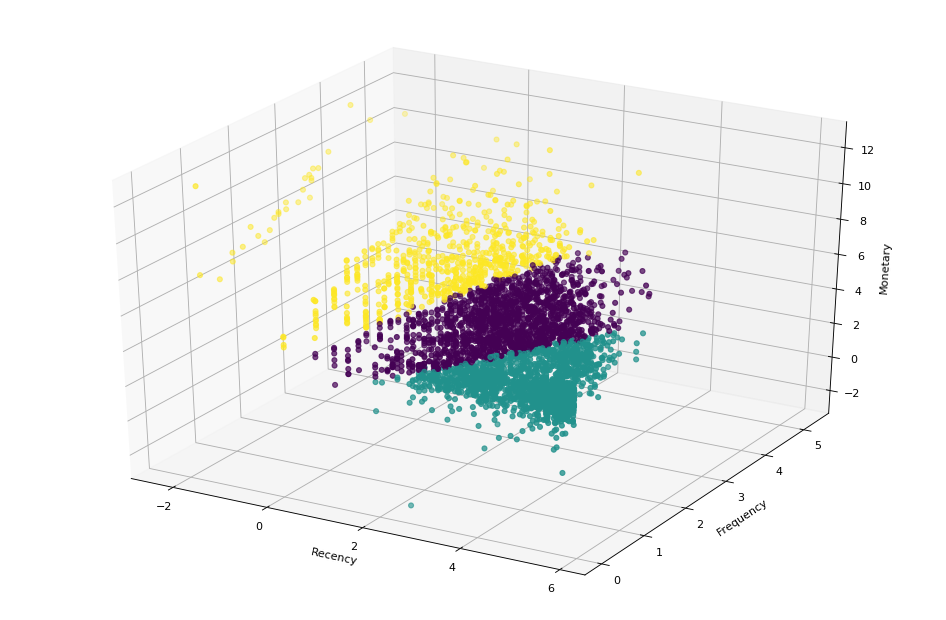

In [43]:
from mpl_toolkits.mplot3d import Axes3D
matrix = log_df.as_matrix()
model = KMeans(n_clusters=3)
model.fit(matrix)
kmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(matrix[:,0],matrix[:,1],matrix[:,2],c=kmeans_labels, cmap='viridis')

xLabel = ax.set_xlabel('Recency', linespacing=3.2)
yLabel = ax.set_ylabel('Frequency', linespacing=3.1)
zLabel = ax.set_zlabel('Monetary', linespacing=3.4)
print("K-Means")

#### Silhouette Method

In [44]:
matrix = log_df.as_matrix()
for n_clusters in range(2,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


For n_clusters = 2 The average silhouette_score is : 0.41996190091177515
For n_clusters = 3 The average silhouette_score is : 0.33493316236499593
For n_clusters = 4 The average silhouette_score is : 0.3455981198116949
For n_clusters = 5 The average silhouette_score is : 0.3142159726413204
For n_clusters = 6 The average silhouette_score is : 0.3214943524156493
For n_clusters = 7 The average silhouette_score is : 0.3201533830785964
For n_clusters = 8 The average silhouette_score is : 0.3083691638276597
For n_clusters = 9 The average silhouette_score is : 0.3096564447457771


## ii. K-Means

In [45]:
n_clusters = 3
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
kmeans.fit(matrix)
clusters_customers = kmeans.predict(matrix)
silhouette_avg = silhouette_score(matrix, clusters_customers)
print('score de silhouette: {:<.3f}'.format(silhouette_avg))

score de silhouette: 0.335


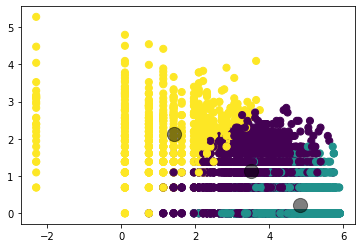

In [46]:
#create a scatter plot
plt.scatter(matrix[:, 0], matrix[:, 1], c=clusters_customers, s=50, cmap='viridis')
#select cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# 2) Mini Batch K Means

#### With Batch Size 1000

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


MiniBatch K-Means with Batch Size 1000


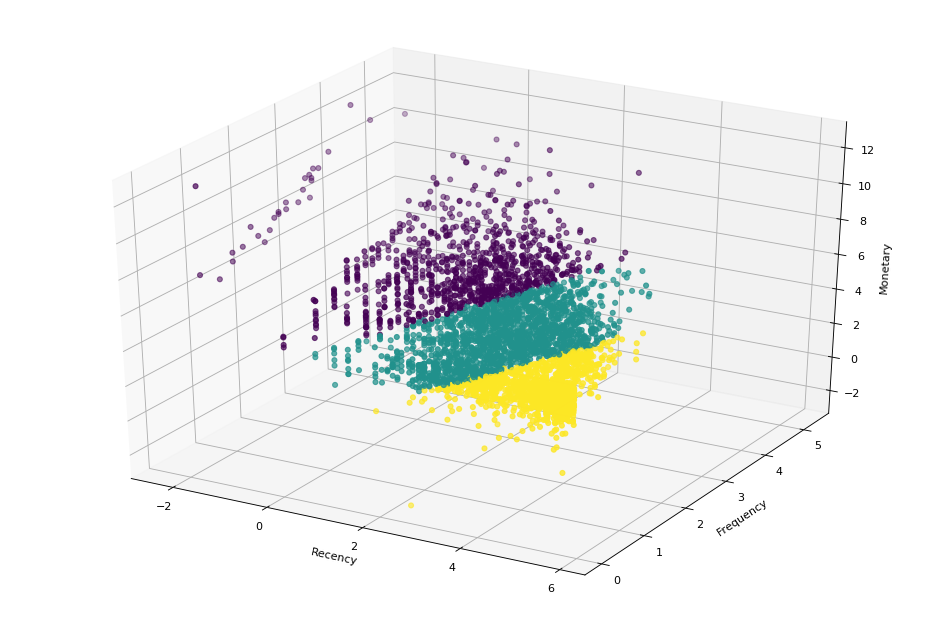

In [47]:
from sklearn.cluster import MiniBatchKMeans
from mpl_toolkits.mplot3d import Axes3D
matrix = log_df.as_matrix()
model = MiniBatchKMeans(n_clusters=3, init='k-means++', max_iter=100, batch_size=1000)
model.fit(matrix)
mkmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(matrix[:,0],matrix[:,1],matrix[:,2],c=mkmeans_labels, cmap='viridis')

xLabel = ax.set_xlabel('Recency', linespacing=3.2)
yLabel = ax.set_ylabel('Frequency', linespacing=3.1)
zLabel = ax.set_zlabel('Monetary', linespacing=3.4)
print("MiniBatch K-Means with Batch Size 1000")

#### With Batch Size 100

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


MiniBatch K-Means with Batch Size 100


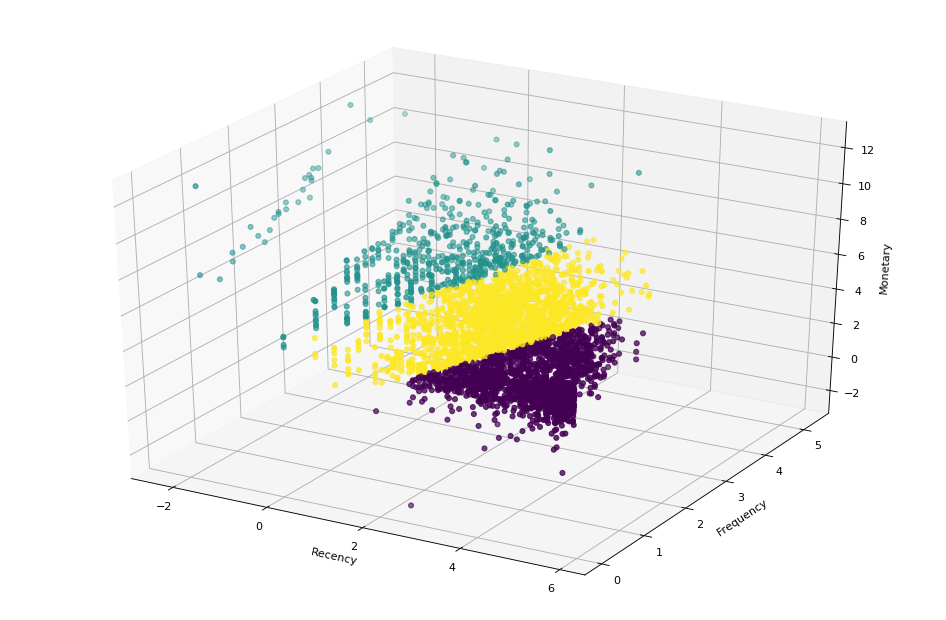

In [48]:
from sklearn.cluster import MiniBatchKMeans
from mpl_toolkits.mplot3d import Axes3D
matrix = log_df.as_matrix()
model = MiniBatchKMeans(n_clusters=3, init='k-means++', max_iter=100, batch_size=100)
model.fit(matrix)
mkmeans_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(matrix[:,0],matrix[:,1],matrix[:,2],c=mkmeans_labels, cmap='viridis')

xLabel = ax.set_xlabel('Recency', linespacing=3.2)
yLabel = ax.set_ylabel('Frequency', linespacing=3.1)
zLabel = ax.set_zlabel('Monetary', linespacing=3.4)
print("MiniBatch K-Means with Batch Size 100")

# 3) Mean Shift Clustering

#### Quantile 0.09

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


Mean Shift Clusterning
Bandwidth is : 1.0916998633987753
Number of estimated clusters : 17


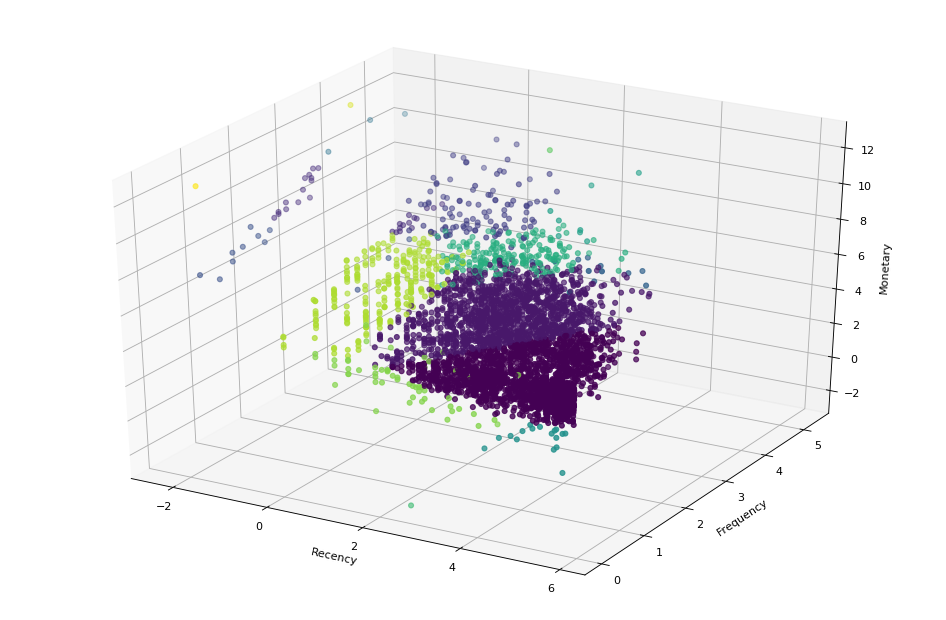

In [49]:
# Mean Shift Clustering

from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
matrix = log_df.as_matrix()

bandwidth=estimate_bandwidth(matrix,quantile=0.09)


analyzer=MeanShift(bandwidth)
analyzer.fit(matrix)
labels=analyzer.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(matrix[:,0],matrix[:,1],matrix[:,2],c=labels, cmap='viridis')

xLabel = ax.set_xlabel('Recency', linespacing=3.2)
yLabel = ax.set_ylabel('Frequency', linespacing=3.1)
zLabel = ax.set_zlabel('Monetary', linespacing=3.4)
print("Mean Shift Clusterning")

labels_unique=np.unique(labels)
n_clusters_=len(labels_unique)
#print the labels of each data 
print("Bandwidth is :",bandwidth)
print("Number of estimated clusters : %d" % n_clusters_)

#### After a lot of tweaking we get 3 clusters at Quantile=0.5

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


Mean Shift Clusterning
Bandwidth is : 2.496171449426325
Number of estimated clusters : 3


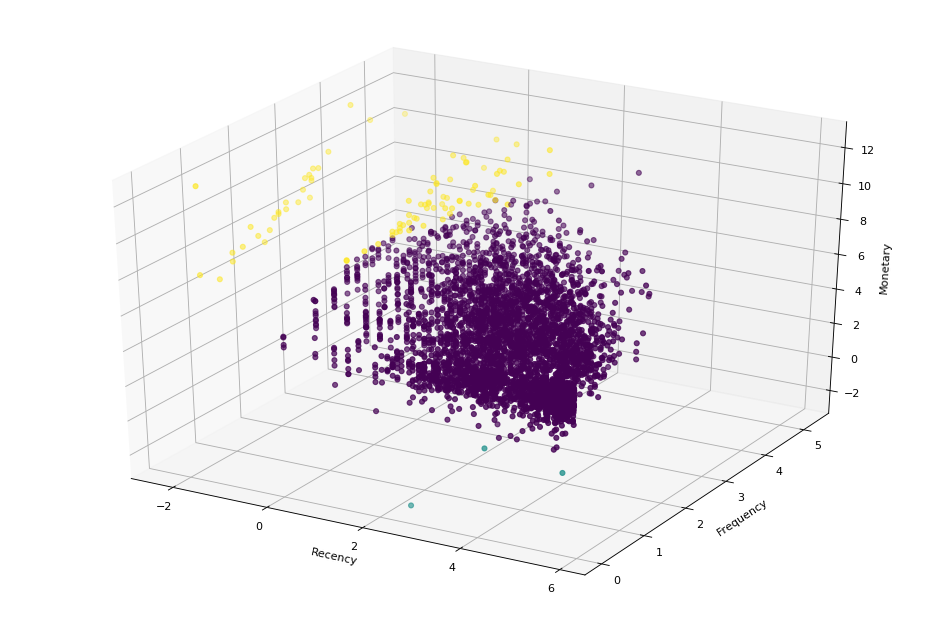

In [50]:
# Mean Shift Clustering

from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
matrix = log_df.as_matrix()

bandwidth=estimate_bandwidth(matrix,quantile=0.5)


analyzer=MeanShift(bandwidth)
analyzer.fit(matrix)
labels=analyzer.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(matrix[:,0],matrix[:,1],matrix[:,2],c=labels, cmap='viridis')

xLabel = ax.set_xlabel('Recency', linespacing=3.2)
yLabel = ax.set_ylabel('Frequency', linespacing=3.1)
zLabel = ax.set_zlabel('Monetary', linespacing=3.4)
print("Mean Shift Clusterning")

labels_unique=np.unique(labels)
n_clusters_=len(labels_unique)
#print the labels of each data 
print("Bandwidth is :",bandwidth)
print("Number of estimated clusters : %d" % n_clusters_)

# 4) Agglomerative Clustering

#### Dendrogram with all 4 types of Linkages

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


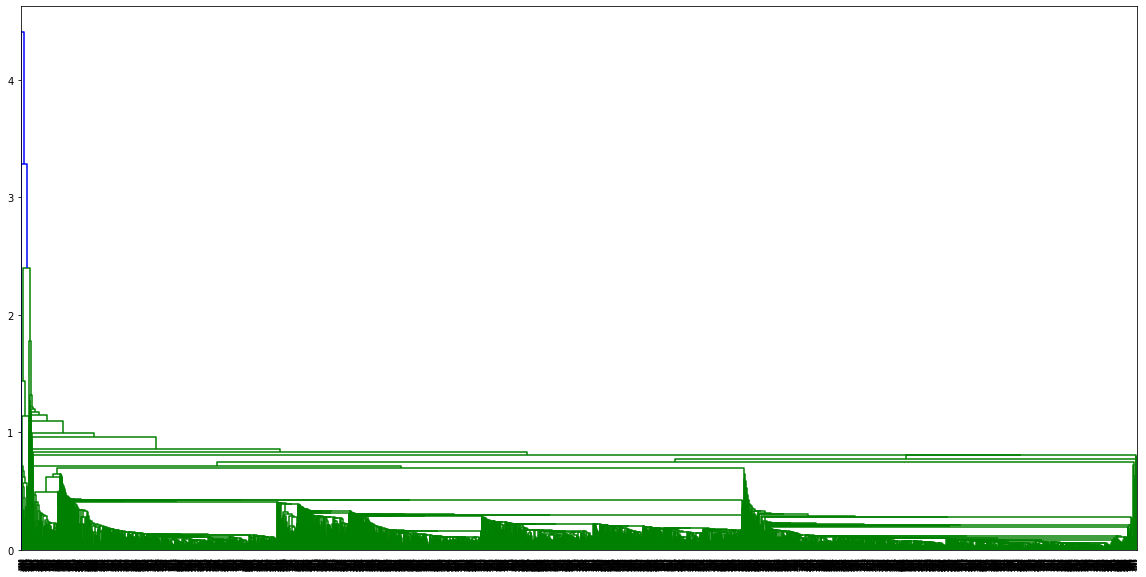

In [51]:
# Single
import scipy.cluster.hierarchy as sch
matrix = log_df.as_matrix()

plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(matrix, method='single'))

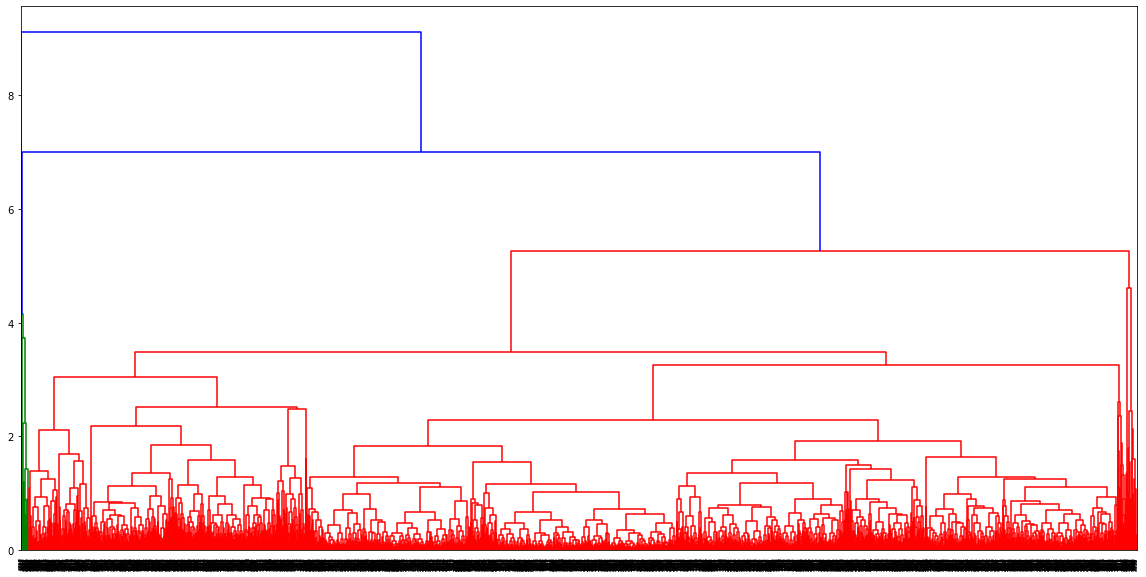

In [52]:
# Average
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(matrix, method='average'))

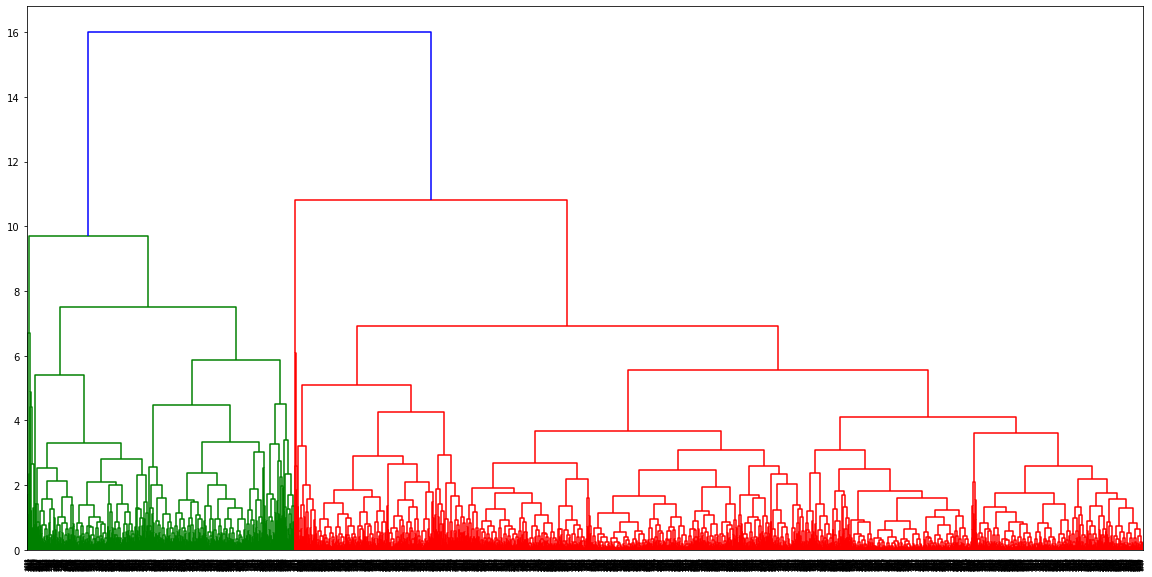

In [53]:
# Complete
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(matrix, method='complete'))

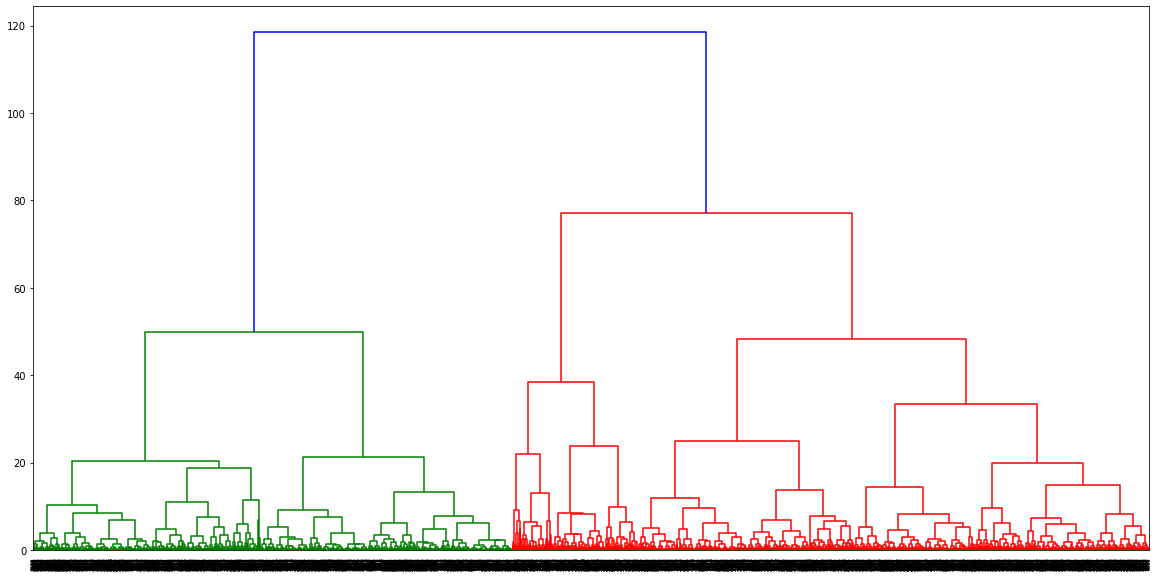

In [54]:
# Ward
plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(matrix, method='ward'))

Hierarchical Agglomerative Clustering


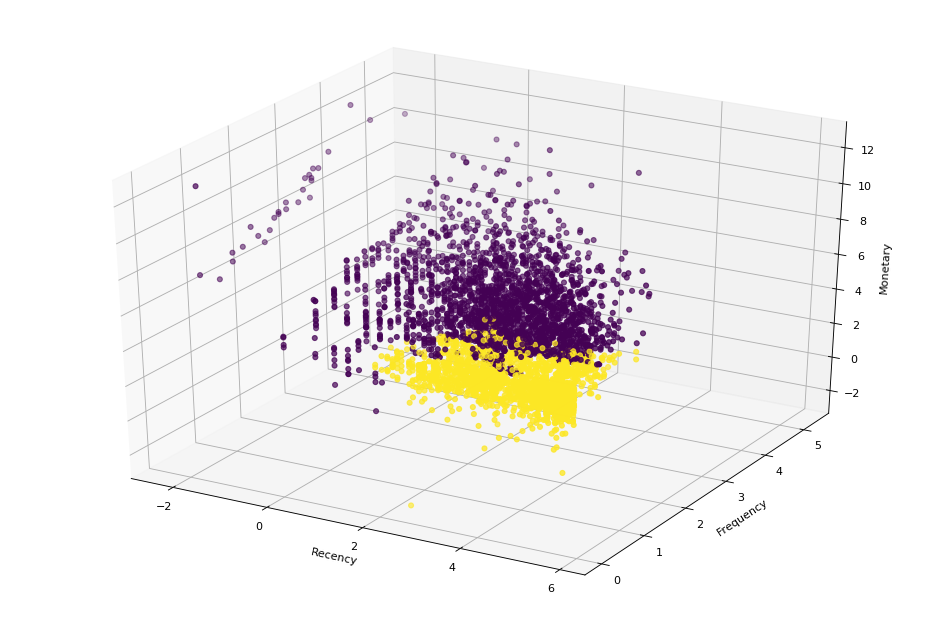

In [55]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=2)
model.fit(matrix)
hac_labels = model.labels_

fig = plt.figure(num=None, figsize=(15, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.axes(projection="3d")

ax.scatter3D(matrix[:,0],matrix[:,1],matrix[:,2],c=hac_labels, cmap='viridis')

xLabel = ax.set_xlabel('Recency', linespacing=3.2)
yLabel = ax.set_ylabel('Frequency', linespacing=3.1)
zLabel = ax.set_zlabel('Monetary', linespacing=3.4)
print("Hierarchical Agglomerative Clustering")

# Clusters

In [56]:
## Cluster By K Means
DS3_clustered_kmeans = rfm_df.assign(Cluster=kmeans_labels)
grouped_kmeans = DS3_clustered_kmeans.groupby(['Cluster']).mean().round(1)
grouped_kmeans

,Recency,Frequency,Monetary
Cluster,,,
0,45.8,3.7,1420.5
1,162.2,1.4,328.8
2,6.8,11.8,6353.3


In [57]:
# Number of customers in each cluster

In [58]:
print("*******Number of customers in each cluster generated by K-Mean (Elbow Method)*******")
pd.DataFrame(pd.Series(kmeans_labels).value_counts(), columns = ['Number of Customers']).T

*******Number of customers in each cluster generated by K-Mean (Elbow Method)*******


,1,0,2
Number of Customers,1611,1577,675


In [59]:
# Clusters by miniBatch KMeans
DS3_clustered_mkmeans = rfm_df.assign(Cluster=mkmeans_labels)
grouped_mkmeans = DS3_clustered_mkmeans.groupby(['Cluster']).mean().round(1)
grouped_mkmeans

,Recency,Frequency,Monetary
Cluster,,,
0,159.4,1.5,376.3
1,5.6,12.7,7094.1
2,37.8,4.0,1529.4


In [60]:
# Number of customers in each cluster

In [61]:
print("*******Number of customers in each cluster generated by Mini Batch K-Means*******")
pd.DataFrame(pd.Series(mkmeans_labels).value_counts(), columns = ['Number of Customers']).T

*******Number of customers in each cluster generated by Mini Batch K-Means*******


,0,2,1
Number of Customers,1729,1569,565


In [62]:
# Clusters by Meanshift
DS3_clustered_mkmeans = rfm_df.assign(Cluster=labels)
grouped_meanshift = DS3_clustered_mkmeans.groupby(['Cluster']).mean().round(1)
grouped_meanshift

,Recency,Frequency,Monetary
Cluster,,,
0,89.5,3.6,1325.7
1,124.7,1.0,3.3
2,1.4,27.4,23135.2


In [63]:
# Number of customers in each cluster

In [64]:
print("*******Number of customers in each cluster generated by Meanshift*******")
pd.DataFrame(pd.Series(labels).value_counts(), columns = ['Number of Customers']).T

*******Number of customers in each cluster generated by Meanshift*******


,0,2,1
Number of Customers,3771,89,3


In [65]:
# Clusters by Agglomerative Clusterning
DS3_clustered_mkmeans = rfm_df.assign(Cluster=hac_labels)
grouped_hac = DS3_clustered_mkmeans.groupby(['Cluster']).mean().round(1)
grouped_hac

,Recency,Frequency,Monetary
Cluster,,,
0,46.6,6.3,2989.3
1,141.9,1.3,284.9


In [66]:
print("*******Number of customers in each cluster generated by Agglomerative Clustering*******")
pd.DataFrame(pd.Series(hac_labels).value_counts(), columns = ['Number of Customers']).T

*******Number of customers in each cluster generated by Agglomerative Clustering*******


,0,1
Number of Customers,2203,1660
